<h1 align="center">Understanding the Correlates of Fatal Crashes in U.S. States</h1>
<h2 align="center">Executive Summary</h2>
<h5 align="center">Doug Minkler</h5>
***

In [5]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<i>Note: the raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.</i>''')


## Introduction

Between 1994 and 2015, total automobile-related fatalities in the United States fell precipitously. Despite the great strides made in automobile safety and education during this time, both the rate and the total number of automobile-related fatalities in the country have begun to rise once more. While this study cannot reveal the causal mechanism behind this recent pivot, it does offer some insight as to the factors that are associated with higher fatality rates in U.S. states. By understanding how fatality rates may rise or fall with some factors, we may be better able to understand why fatality rates may experience fluctuations in the short and long-term. 

### Research Question

Which variables help to explain changes in crash fatality rates (measured as fatal crashes per 100 million vehicle miles travelled)?

### Dataset and Variables

This study uses data from the National Highway Traffic Safety Administration (NHTSA), the American Association of Civil Engineers (ASCE) and the U.S. Census Bureau. Crash fatality data are taken from the [Fatality Analysis Reporting System](#https://www-fars.nhtsa.dot.gov/States/StatesFatalitiesFatalityRates.aspx) through the NHTSA. Road quality data are from the ASCE's [Infrastructure Report Card Map](#https://www.infrastructurereportcard.org/infrastructure-super-map/). State-level demographic data (including median age, per capita income, ruralness, and mean commute times) are all provided through the U.S. Census Bureau. In total there are 50 observations in the dataset, with the unit of analysis being the state. Each of the aforementioned variables are called upon as possible explanatory variables for understanding differences in our independent varaiable (fatal crash rates) between states.

## Methods 

To answer the research question, two primary statistical methods were used: 1) basic correlation analysis; and 2) linear regression model.

## Results

Starting with our correlation analysis, we find that our included explanatory variables have weak to moderately strong relationships with our independent variable. Variables for per capita income, mean travel time, and road quality, all have correlation coefficients above 0.4, whereas variables for median age and the percentage of fatal crash incidents involving a victim with a blood alcohol content above the legally allowable limit have much weaker correlation coefficents (<0.2).

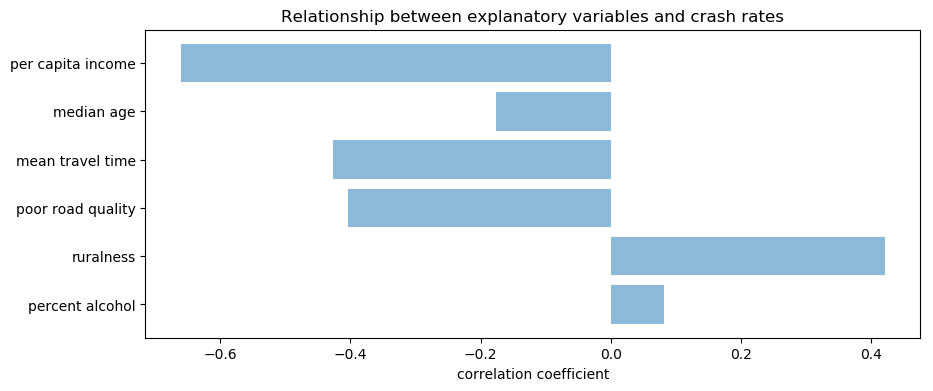

In [28]:
crashesVMTalcohol=crashdata.iloc[:,[2,4]]
crashesVMTalcohol.corr() 
crashesVMTalcoholcorr=0.082138
crashesVMTrural=crashdata.iloc[:,[2,6]]
crashesVMTroadquality=crashdata.iloc[:,[2,3]]
crashesVMTtraveltime=crashdata.iloc[:,[2,5]]
crashesVMTage=crashdata.iloc[:,[2,7]]
crashesVMTincome=crashdata.iloc[:,[2,8]]
crashesVMTrural.corr()
crashesVMTruralcorr=0.421104
crashesVMTroadquality.corr()
crashesVMTroadqualitycorr=-0.403843
crashesVMTtraveltime.corr()
crashesVMTtraveltimecorr=-0.427239
crashesVMTage.corr()
crashesVMTagecorr=-0.176086
crashesVMTincome.corr()
crashesVMTincomecorr= -0.660551

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 4

explanatoryvariables=['percent alcohol', 'ruralness', 'poor road quality', 'mean travel time', 'median age', 'per capita income']  
coefficients=[crashesVMTalcoholcorr, crashesVMTruralcorr, crashesVMTroadqualitycorr, crashesVMTtraveltimecorr, crashesVMTagecorr, crashesVMTincomecorr]
dict={'explanatoryvariables':explanatoryvariables, 'coefficients':coefficients}
correlationdf=pd.DataFrame.from_dict(dict)
explanvar=correlationdf.iloc[:,[1]]
yy_pos = np.arange(len(explanvar))

plt.barh(yy_pos, coefficients, align='center', alpha=0.5)
plt.yticks(yy_pos, explanvar['explanatoryvariables'])
plt.xlabel('correlation coefficient')
plt.title('Relationship between explanatory variables and crash rates')

plt.show()

Although computing correlation coefficients may tip us off to those variables which covary with our variable of interest, to measure the strength of these relationships we also ran a regression model using the variables described in an earlier section. 

In [31]:
pd.concat({'Coefficients':LinRegEPI.params,
           'Significant?':LinRegEPI.pvalues<0.05},axis=1)

,Coefficients,Significant?
Intercept,2.386575,True
Percent_of_fatal_accidents_involving_BAC_above_legal_limit,0.017904,True
Poor_Roads,-0.004902,False
Mean_commute_time,0.005832,False
Ruralness,0.004122,False
Median_age,-0.019467,False
Per_capita_income,-0.000040,True


As our regression results reveal, only two of our explanatory variables returned statistically significant results. That is, only the presence of alcohol above the legal limit and per capita income seem to have a statistically significant effect on fatal crash rates between states. A one percent increase in alcohol-related crash-fatalities, on average, raises fatality rates by about .018 (per 100 million VMT). A one thousand dollar increase in per capita income, meanwhile, is expected to lower fatality rates by .04 (per 100 million VMT). In total our model was able to explain about half of the variation in fatal crash rates (Adj. r-squared = 0.50). 

## Discussion

That per capita income returned a statistically signficant and negative regression coefficient should not be surprising. There are numerous reasons to believe that an increase in per capita income may reduce crash fatality rates. For one, increased per capita income may be associated with higher infrastructure investments in a state. Greater infrastructure spending often means newer and safer roads. At the same time, higher per capita income may be associated with ownership of newer and safer cars, among many other factors. 

In a more curious manner, where alcohol use tends to constitute a greater proportion of all fatal crash incidents, fatality rates appear to be higher overall too. The prevalance of alcohol in crash fatality numbers may be a symptom of a broader macroeconomic, social, or legal atmosphere within a state which may also be affecting fatal crash rates. 
More likely, and somewhat unfortunately, however, the presence of alcohol probably tends to result in more severe (i.e. fatal) crashes than crashes that do not involve alcohol. Thus, the statistically significant effect observed in our regression, I hypothesize, is the result of alcohol-related crashes having a higher probability of being fatal in the first place. Of course, it would be helpful to know what leads to a higher concentration of alcohol-related fatalities, but that is beyond the scope of this research.

## Conclusion and Future Research

This study set out to explore those varibles which help to explain differences in crash fatality rates. The author maintains that undertanding these factors may help us make sense of why crash rates may have begun increasing in the past few years. Based on our results, we can claim that the presence of alcohol and a state's per capita income have statistically significant effects on fatal crash rates. Although we now have a couple of variables which can explain some of the changes in fatal crash rates, the preponderance of this evidence cannot suffice as an explanation for why crash rates have begun to increase in the past few years. 

Some variables which were left out of this study which may be important to future research may include variables for the extent to which safety laws (such as seatbelts, and distracted driving laws) are codified and enforced. Legal statutes around drinking ages for each state may also prove informative. If one wants to understand why rates may be increasing in the past few years, having time series data on each of these variables could also be helpful. Finally, it may prove fruitful to map the relationships between the explanatory and independent variable(s) to help detect relationships where large datasets may be too cumbersome.